In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from imblearn.over_sampling import SMOTE

In [2]:
# Read CSV
df = pd.read_csv("Absenteeism_at_work_Project.csv")

# Check first 5 rows
df.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26.0,7.0,3,1,289.0,36.0,13.0,33.0,"2,39,554",...,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,4.0
1,36,0.0,7.0,3,1,118.0,13.0,18.0,50.0,"2,39,554",...,1.0,1.0,1.0,1.0,0.0,0.0,98.0,178.0,31.0,0.0
2,3,23.0,7.0,4,1,179.0,51.0,18.0,38.0,"2,39,554",...,0.0,1.0,0.0,1.0,0.0,0.0,89.0,170.0,31.0,2.0
3,7,7.0,7.0,5,1,279.0,5.0,14.0,39.0,"2,39,554",...,0.0,1.0,2.0,1.0,1.0,0.0,68.0,168.0,24.0,4.0
4,11,23.0,7.0,5,1,289.0,36.0,13.0,33.0,"2,39,554",...,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,2.0


In [3]:
# Check last 5 rows
df.tail()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
735,11,14.0,7.0,3,1,289.0,36.0,13.0,33.0,"2,64,604",...,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,8.0
736,1,11.0,7.0,3,1,235.0,11.0,14.0,37.0,"2,64,604",...,0.0,3.0,1.0,0.0,0.0,1.0,88.0,172.0,29.0,4.0
737,4,0.0,0.0,3,1,118.0,14.0,13.0,40.0,"2,71,219",...,0.0,1.0,1.0,1.0,0.0,8.0,98.0,170.0,34.0,0.0
738,8,0.0,0.0,4,2,231.0,35.0,14.0,39.0,"2,71,219",...,0.0,1.0,2.0,1.0,0.0,2.0,100.0,170.0,35.0,0.0
739,35,0.0,0.0,6,3,179.0,45.0,14.0,53.0,"2,71,219",...,0.0,1.0,1.0,0.0,0.0,1.0,77.0,175.0,25.0,0.0


In [4]:
# Drop last 5 rows (example)
df = df.iloc[:-5]

# Verify
df.shape
df.tail()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
730,6,22.0,7.0,3,1,189.0,29.0,13.0,33.0,"2,64,604",...,0.0,1.0,2.0,0.0,0.0,2.0,69.0,167.0,25.0,16.0
731,34,23.0,7.0,4,1,118.0,10.0,10.0,37.0,"2,64,604",...,0.0,1.0,0.0,0.0,0.0,0.0,83.0,172.0,28.0,2.0
732,10,22.0,7.0,4,1,361.0,52.0,3.0,28.0,"2,64,604",...,0.0,1.0,1.0,1.0,0.0,4.0,80.0,172.0,27.0,8.0
733,28,22.0,7.0,4,1,225.0,26.0,9.0,28.0,"2,64,604",...,0.0,1.0,1.0,0.0,0.0,2.0,69.0,169.0,24.0,8.0
734,13,13.0,7.0,2,1,369.0,17.0,12.0,31.0,"2,64,604",...,0.0,1.0,3.0,1.0,0.0,0.0,70.0,169.0,25.0,80.0


In [5]:
# Drop ID column if present
if 'ID' in df.columns:
    df.drop(columns=['ID'], inplace=True)          #data cleaning

# Check missing values
df.isnull().sum()

# Check duplicates
df.duplicated().sum()

np.int64(25)

In [6]:
 # features engineering
# Convert absenteeism hours into binary target
df['Absent'] = np.where(df['Absenteeism time in hours'] > 0, 1, 0)

# Drop original target
df.drop(columns=['Absenteeism time in hours'], inplace=True)

# Check balance
df['Absent'].value_counts()

Absent
1    680
0     55
Name: count, dtype: int64

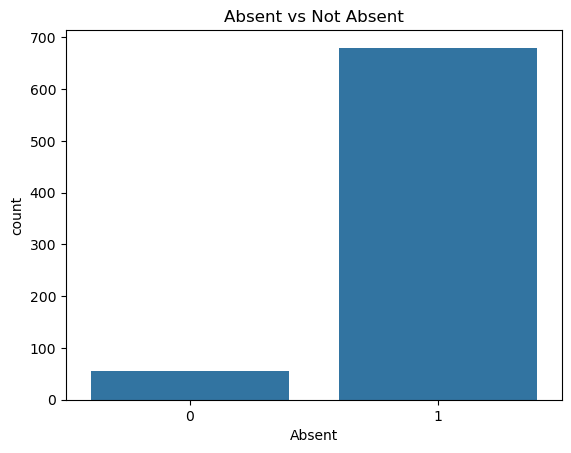

In [7]:
 #EDA
# Class distribution       
sns.countplot(x='Absent', data=df)
plt.title("Absent vs Not Absent")
plt.show()



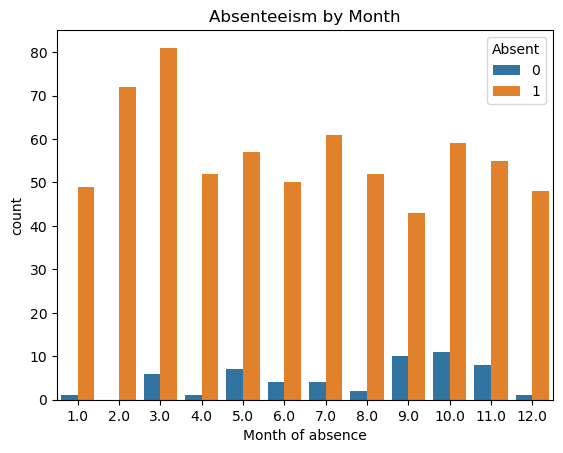

In [8]:

# Absenteeism by Month
sns.countplot(x='Month of absence', hue='Absent', data=df)
plt.title("Absenteeism by Month")
plt.show()


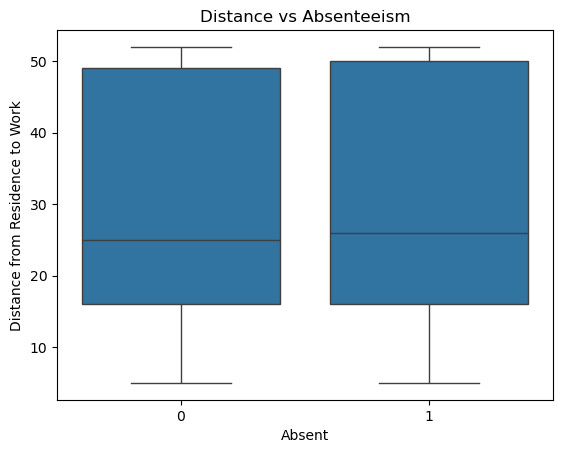

In [9]:
# Distance vs Absenteeism
sns.boxplot(x='Absent', y='Distance from Residence to Work', data=df)
plt.title("Distance vs Absenteeism")
plt.show()


C:\Users\Admin\AppData\Local\Temp\ipykernel_2928\2835849156.py:9: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df_clean = df_clean.apply(pd.to_numeric, errors='ignore')


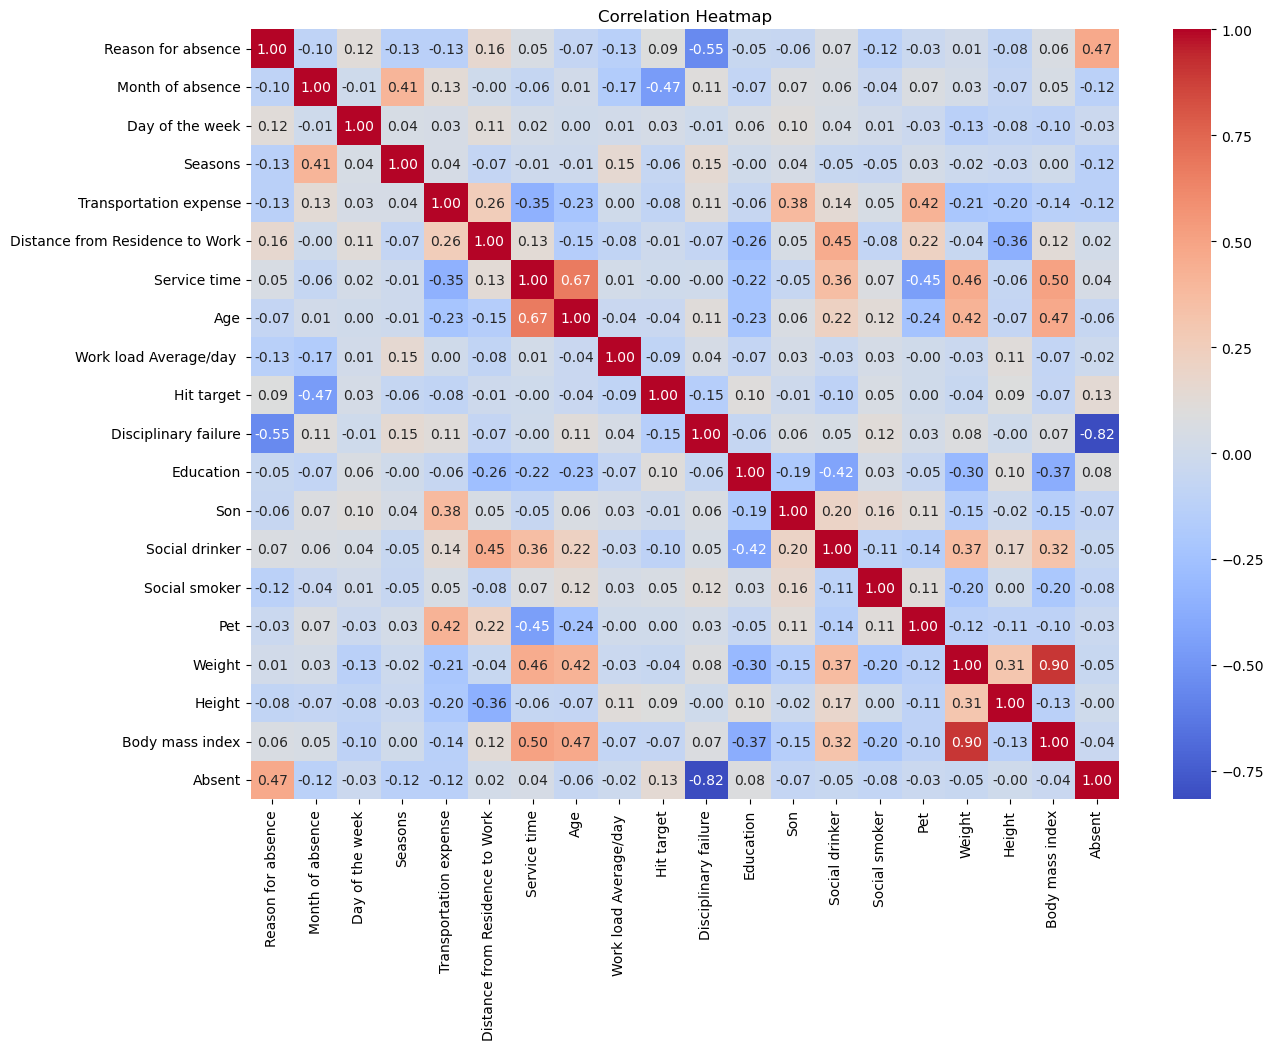

In [10]:


# --- Load your dataset ---
# Example: df = pd.read_csv("your_file.csv")
# Replace with your actual data loading step
# df = pd.read_excel("your_file.xlsx")

# --- Step 1: Clean numeric-like strings ---
# Remove commas and convert to numeric where possible
df_clean = df.replace(',', '', regex=True)
df_clean = df_clean.apply(pd.to_numeric, errors='ignore')

# --- Step 2: Select only numeric columns ---
numeric_df = df_clean.select_dtypes(include=['float64', 'int64'])

# --- Step 3: Plot correlation heatmap ---
plt.figure(figsize=(14,10))
sns.heatmap(numeric_df.corr(), cmap='coolwarm', annot=True, fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


In [11]:
df.isnull().sum()

Reason for absence                  3
Month of absence                    1
Day of the week                     0
Seasons                             0
Transportation expense              7
Distance from Residence to Work     3
Service time                        3
Age                                 3
Work load Average/day              10
Hit target                          6
Disciplinary failure                6
Education                          10
Son                                 6
Social drinker                      3
Social smoker                       4
Pet                                 2
Weight                              1
Height                             14
Body mass index                    31
Absent                              0
dtype: int64

In [12]:
numeric_cols = df.select_dtypes(include=['int64','float64']).columns

for col in numeric_cols:
    df[col].fillna(df[col].median(), inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_2928\683477553.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)


In [13]:
df.isnull().sum()

Reason for absence                  0
Month of absence                    0
Day of the week                     0
Seasons                             0
Transportation expense              0
Distance from Residence to Work     0
Service time                        0
Age                                 0
Work load Average/day              10
Hit target                          0
Disciplinary failure                0
Education                           0
Son                                 0
Social drinker                      0
Social smoker                       0
Pet                                 0
Weight                              0
Height                              0
Body mass index                     0
Absent                              0
dtype: int64

In [27]:
# train test split
X = df.drop('Absent', axis=1)
y = df['Absent']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [28]:

# 5. Feature scaling
# -------------------------------
# Keep only numeric columns for scaling
X_train_num = X_train.select_dtypes(include=['float64','int64'])
X_test_num = X_test.select_dtypes(include=['float64','int64'])

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_num)
X_test_scaled = scaler.transform(X_test_num)

# -------------------------------
# 6. Ready for modeling
# -------------------------------
print("Training data shape:", X_train_scaled.shape)
print("Test data shape:", X_test_scaled.shape)


Training data shape: (588, 18)
Test data shape: (147, 18)


In [29]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to balance the training set
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train_scaled, y_train)

# Check new class distribution
print(pd.Series(y_train_bal).value_counts())


Absent
1    544
0    544
Name: count, dtype: int64


In [30]:
# -------------------------------
# 5. Train models and evaluate
# -------------------------------
models = {
    "Logistic Regression": LogisticRegression(class_weight='balanced'),
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(class_weight='balanced'),
    "Random Forest": RandomForestClassifier(class_weight='balanced'),
    "SVM": SVC(class_weight='balanced')
}

results = []

for name, model in models.items():
    model.fit(X_train_bal, y_train_bal)
    y_pred = model.predict(X_test_scaled)   # <-- FIXED: use scaled numeric test set
    
    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred)
    })

results_df = pd.DataFrame(results)
print(results_df)


                 Model  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression  0.904762   0.976562  0.919118  0.946970
1                  KNN  0.897959   0.976378  0.911765  0.942966
2          Naive Bayes  0.938776   0.977444  0.955882  0.966543
3        Decision Tree  0.938776   0.970370  0.963235  0.966790
4        Random Forest  0.959184   0.977941  0.977941  0.977941
5                  SVM  0.918367   0.976923  0.933824  0.954887


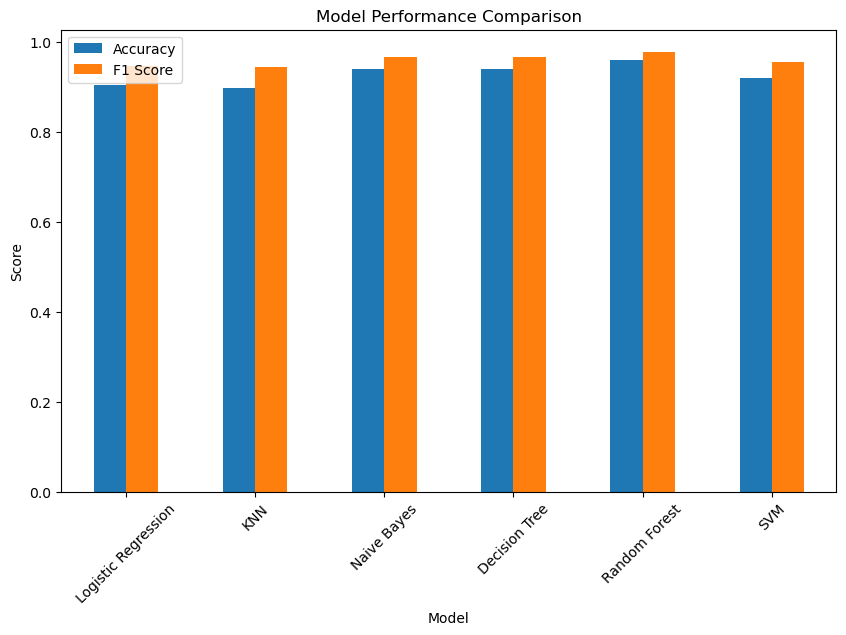

In [31]:
results_df.set_index("Model")[["Accuracy", "F1 Score"]].plot(kind='bar', figsize=(10,6))
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.show()

In [32]:
#hyperparametre tunning
lr_params = {'C': [0.01, 0.1, 1, 10]}
lr_grid = GridSearchCV(LogisticRegression(class_weight='balanced'), lr_params, cv=5, scoring='f1')
lr_grid.fit(X_train_bal, y_train_bal)
best_lr = lr_grid.best_estimator_
lr_grid.best_params_
                                             #logistic regression

{'C': 1}

In [33]:
knn_params = {'n_neighbors': [3,5,7,9]}
knn_grid = GridSearchCV(KNeighborsClassifier(), knn_params, cv=5, scoring='f1')
knn_grid.fit(X_train_bal, y_train_bal)
best_knn = knn_grid.best_estimator_
knn_grid.best_params_

{'n_neighbors': 3}

In [34]:
dt_params = {'max_depth': [None, 10, 20]}
dt_grid = GridSearchCV(DecisionTreeClassifier(class_weight='balanced'), dt_params, cv=5, scoring='f1')
dt_grid.fit(X_train_bal, y_train_bal)
best_dt = dt_grid.best_estimator_
dt_grid.best_params_

{'max_depth': 10}

In [35]:
rf_params = {'n_estimators':[100,200],'max_depth':[None,10,20]}
rf_grid = GridSearchCV(RandomForestClassifier(class_weight='balanced', random_state=42), rf_params, cv=5, scoring='f1', n_jobs=-1)
rf_grid.fit(X_train_bal, y_train_bal)
best_rf = rf_grid.best_estimator_
rf_grid.best_params_

{'max_depth': 10, 'n_estimators': 100}

In [36]:
svm_params = {'C':[0.1,1,10],'kernel':['linear','rbf']}
svm_grid = GridSearchCV(SVC(class_weight='balanced'), svm_params, cv=5, scoring='f1')
svm_grid.fit(X_train_bal, y_train_bal)
best_svm = svm_grid.best_estimator_
svm_grid.best_params_

{'C': 10, 'kernel': 'rbf'}

In [37]:
import pandas as pd
from sklearn.metrics import accuracy_score, f1_score
from sklearn.naive_bayes import GaussianNB

# --- Fit Naive Bayes before using it ---
nb = GaussianNB()
nb.fit(X_train_bal, y_train_bal)   # train on balanced training set

# --- Dictionary of trained models ---
final_models = {
    "Logistic Regression": best_lr,
    "KNN": best_knn,
    "Naive Bayes": nb,             # use fitted NB model
    "Decision Tree": best_dt,
    "Random Forest": best_rf,
    "SVM": best_svm
}

# --- Evaluate all models ---
final_results = []
for name, model in final_models.items():
    preds = model.predict(X_test_scaled)   # <-- FIXED: use scaled numeric test set
    final_results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, preds),
        "F1 Score": f1_score(y_test, preds)
    })

# --- Results DataFrame ---
results_df = pd.DataFrame(final_results)
print(results_df)


                 Model  Accuracy  F1 Score
0  Logistic Regression  0.904762  0.946970
1                  KNN  0.925170  0.958801
2          Naive Bayes  0.938776  0.966543
3        Decision Tree  0.931973  0.962963
4        Random Forest  0.965986  0.981685
5                  SVM  0.945578  0.970370


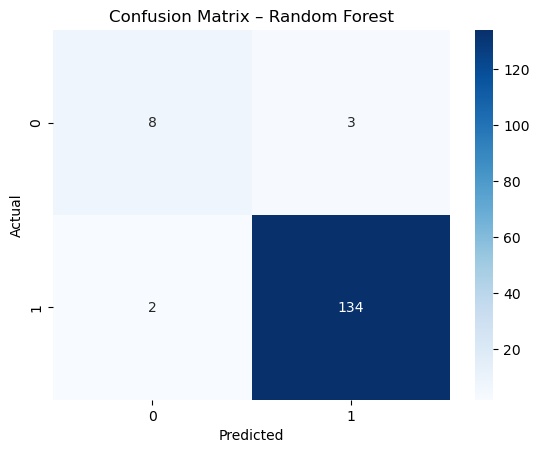

In [38]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Use the scaled numeric test set
best_preds = best_rf.predict(X_test_scaled)   # <-- FIXED

# Plot confusion matrix
sns.heatmap(confusion_matrix(y_test, best_preds), annot=True, fmt='d', cmap="Blues")
plt.title("Confusion Matrix – Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [39]:
# Predict on a single sample using the scaled test set
sample_prediction = best_rf.predict(X_test_scaled[:1])
print(sample_prediction)

# Interpretation
# 1 = Absent, 0 = Not Absent


[1]
